# Samuel Watkins, 3032132676
---
# Final Project, AY250, Spring 2018
## Due Thursday, May 10, 5 PM

This is the testing script to run the DIDV analysis suite. With the git repository downloaded, it should be as simple as running each cell in order to reproduce the results that I have.

Import the needed packages to run the test script.

In [1]:
from DIDV import processDIDV
import matplotlib.pyplot as plt
import numpy as np
import h5py

%matplotlib inline

Set all of the necessary parameters and load the traces from an HDF5 file in the repository.

In [2]:
# Setting various parameters that are specific to the dataset
Rshunt = 5.0e-3
Rbias_SG = 20000.0
Rfb = 5000.0
loopgain = 2.4
ADCperVolt = 65536.0/2.0
fs = 625.0e3
sgFreq = 100.0
sgAmp = 0.009381 /Rbias_SG
drivergain = 4.0
Rp = 0.0060367199999999998
Rload = Rshunt+Rp
dRload = 0.0001
R0 = 0.075570107054005367
dR0 = 8.96383052e-04

convToAmps = Rfb * loopgain * drivergain * ADCperVolt

saveResults = True

# load the dataset
with h5py.File('example_traces.h5','r') as f:
    rawTraces = np.array(f["rawTraces"])

fileSaveName = "example_traces_data"

# set the priors information, for use the priors fitting
priors = np.zeros(7)
invpriorsCov = np.zeros((7,7))
priors[0] = Rload
priors[1] = R0
invpriorsCov[0,0] = 1.0/dRload**2
invpriorsCov[1,1] = 1.0/dR0**2
dt0=-18.8e-6

Run the processing package on the data.

In [3]:
print('Starting processing...')
savedData = processDIDV(rawTraces,priors=priors,invpriorsCov=invpriorsCov,timeOffset=0,
                        dt0=dt0,traceGain=convToAmps,sgFreq=sgFreq,sgAmp=sgAmp,
                        fs=fs,dutycycle=0.5,add180Phase=False,fit=True,autoCut=True,
                        pathSave='',fileStr=fileSaveName,makePlots=True,
                        saveResults=saveResults,R0=R0,dR0=dR0,Rp=Rp,dRp=dRload,Rsh=Rshunt)

print("Done!")

Starting processing...


General.py:87: RuntimeWarning: overflow encountered in exp
  dummyTemplate = (1.0-np.exp(-time/tau_risepulse))*np.exp(-time/tau_fallpulse)
General.py:87: RuntimeWarning: overflow encountered in multiply
  dummyTemplate = (1.0-np.exp(-time/tau_risepulse))*np.exp(-time/tau_fallpulse)
/galbadata/analysis/packages/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


Done!


In [4]:
from pprint import pprint

pprint(savedData)

{'FitCost_p1': 345898.98403256154,
 'FitCost_p2': 8256.4512125699584,
 'FitCost_p3': 8093.3605216490778,
 'FitCov_p1': array([[  6.25152576e-07,  -3.23609725e-11,   3.23531593e-11],
       [ -3.23609725e-11,   3.96761905e-13,  -3.96557305e-13],
       [  3.23531593e-11,  -3.96557305e-13,   3.96618116e-13]]),
 'FitCov_p2': array([[  8.95588604e-08,   9.81800209e-07,   1.08544438e-09,
         -6.59279008e-13,   3.21122960e-13],
       [  9.81800209e-07,   2.22352746e-04,   2.09124109e-07,
         -9.52573391e-12,   6.95435629e-12],
       [  1.08544438e-09,   2.09124109e-07,   2.12877282e-10,
         -1.41939437e-14,   7.33492730e-15],
       [ -6.59279008e-13,  -9.52573391e-12,  -1.41939437e-14,
          4.16551314e-16,  -2.76590587e-16],
       [  3.21122960e-13,   6.95435629e-12,   7.33492730e-15,
         -2.76590587e-16,   2.76387390e-16]]),
 'FitCov_p3': array([[  1.31892792e-07,   1.22940085e-05,  -5.09521081e-06,
          1.23057569e-08,  -1.36432468e-12,   5.78648397e-09,
 

Let's look at the generated plots to make sure it's working correctly

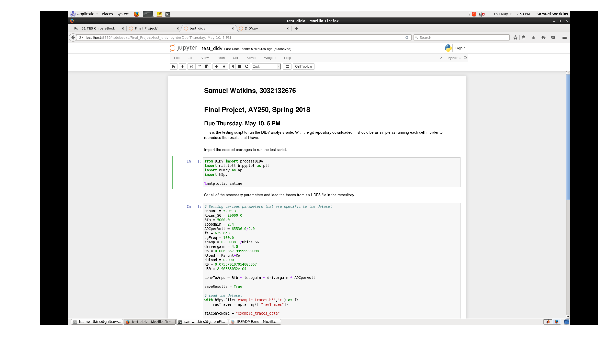

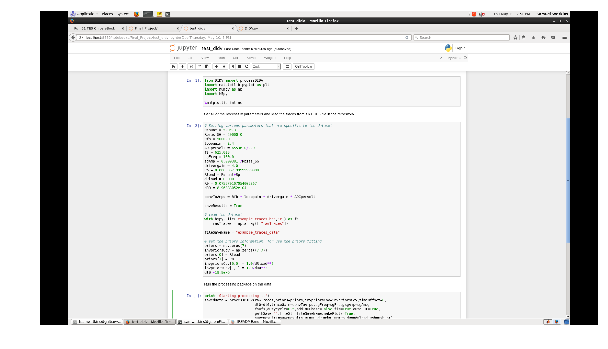

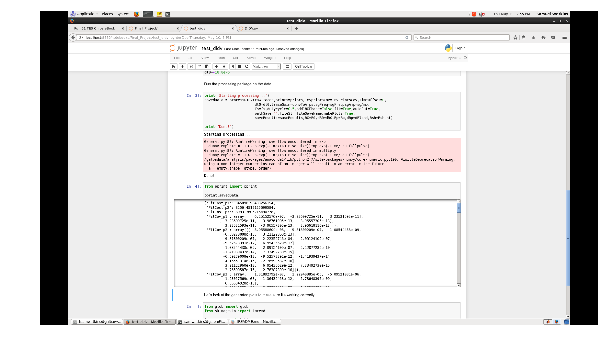

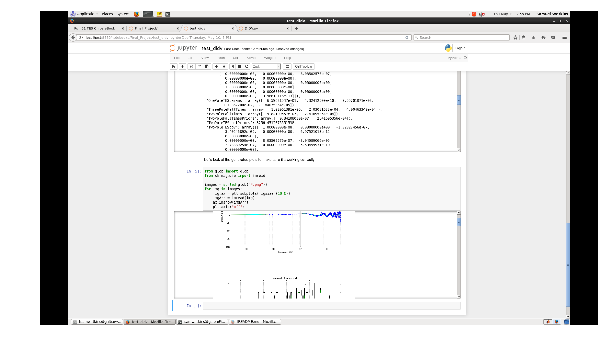

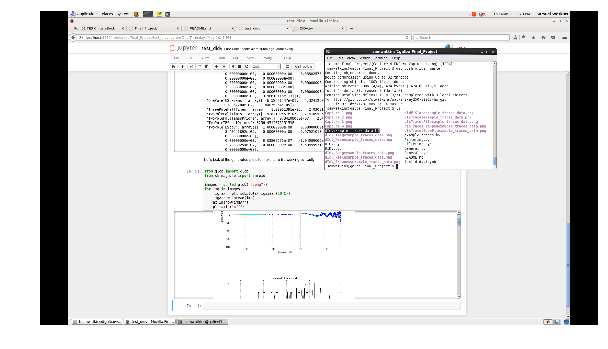

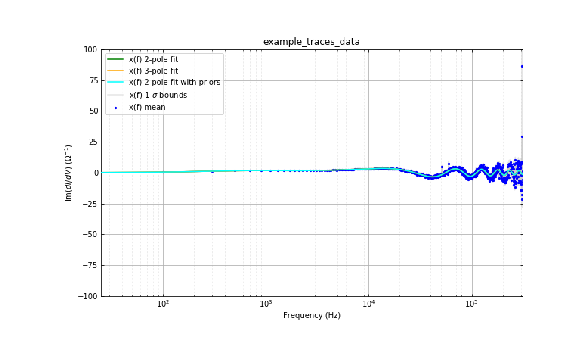

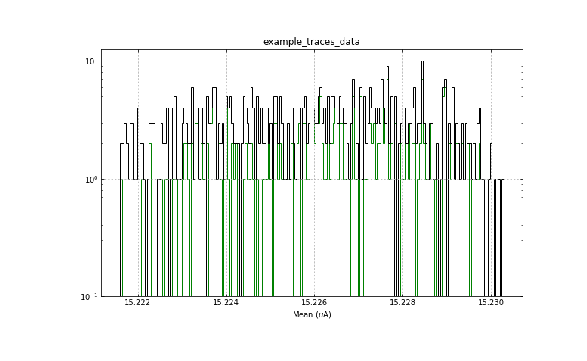

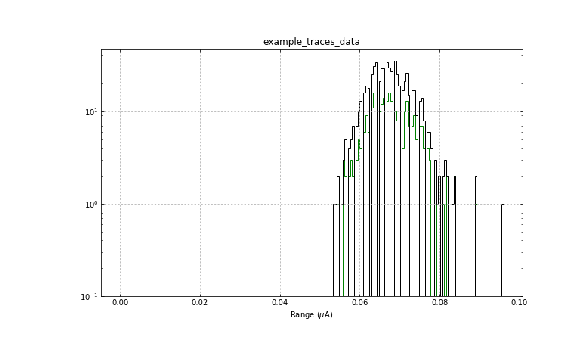

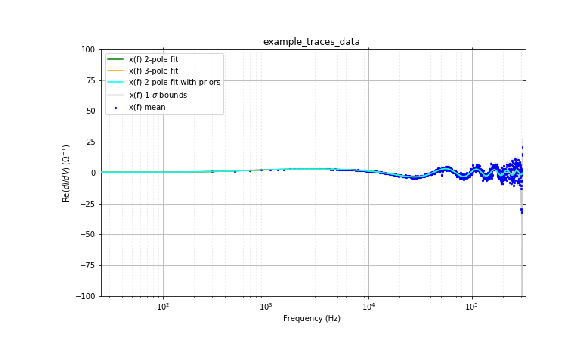

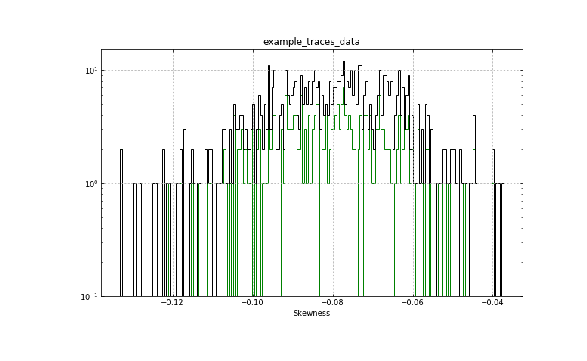

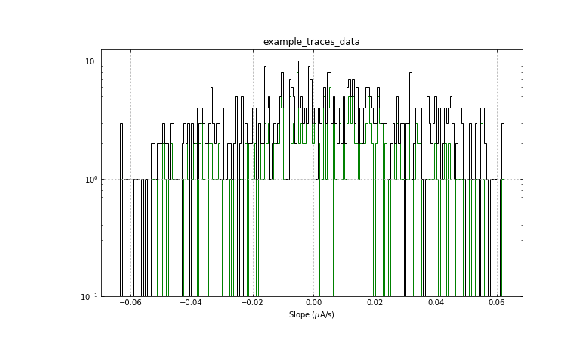

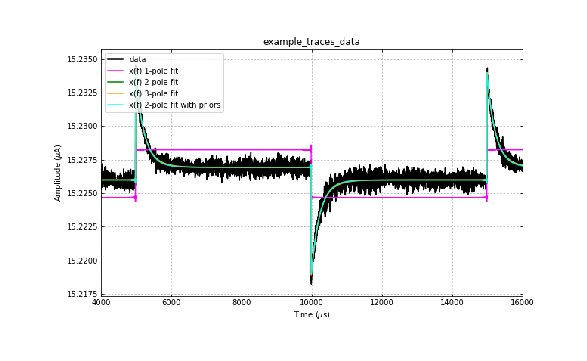

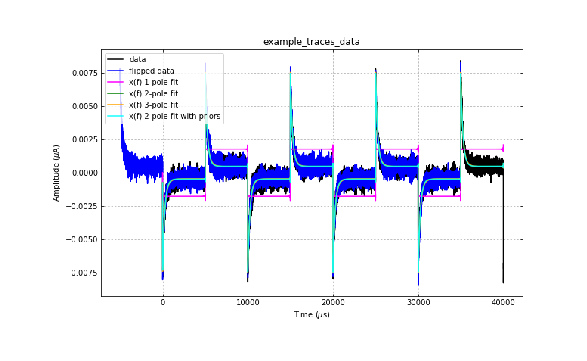

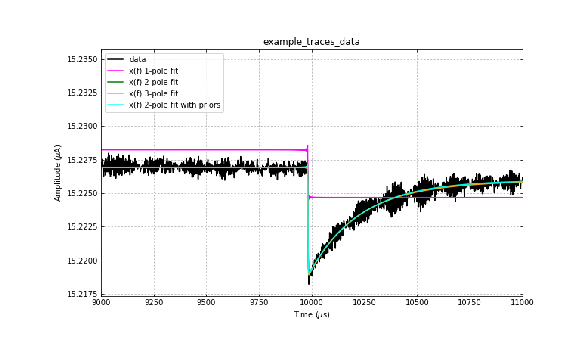

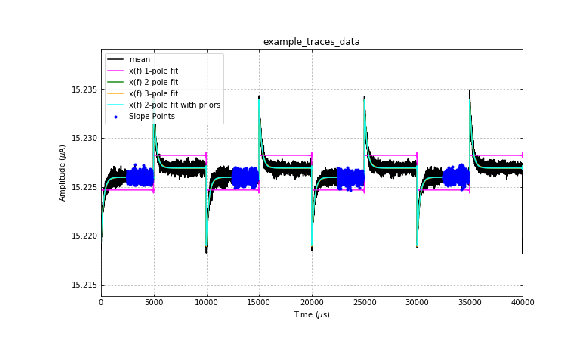

In [5]:
from glob import glob
from skimage.io import imread
import os

imageList = sorted(glob("*.png"))

files = [img for img in imageList 
         if not os.path.basename(img).startswith('Capture')]

for img in images:
    fig,ax = plt.subplots(figsize=(10,6))
    imgArr = imread(img)
    ax.imshow(imgArr)
    plt.axis("off")